In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[[218 217 216 ... 244 239 233]
 [216 214 215 ... 239 235 232]
 [211 211 214 ... 237 232 234]
 ...
 [208 195 209 ... 225 224 221]
 [211 210 216 ... 204 209 200]
 [217 205 202 ... 214 209 226]]


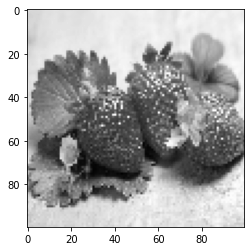

In [ ]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm 
datadir = "/content/drive/MyDrive/AI/Fruit"
categories=['dau','duahau','dudu','mit','nho','oi','saurieng','tao','thanhlong','xoai']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [ ]:
#creating training data
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 20/20 [00:07<00:00,  2.66it/s]

200


In [ ]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('x',x.shape)
print('y',y.shape)

x (200, 100, 100, 1)
y (200,)


In [ ]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/AI/Fruit/save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/AI/Fruit/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical
pickle_in = open("/content/drive/MyDrive/AI/Fruit/save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/AI/Fruit/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (200, 100, 100, 1)
y (200,)


In [ ]:
y= to_categorical(y,10)
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))


In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=100,batch_size=64,validation_split=0.1,verbose=1)

Epoch 1/100
3/3 [==============================] - 14s 596ms/step - loss: 7.5669 - accuracy: 0.1056 - val_loss: 8.0665 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 60ms/step - loss: 2.7122 - accuracy: 0.1278 - val_loss: 3.3037 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 61ms/step - loss: 2.2311 - accuracy: 0.1556 - val_loss: 4.6537 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 62ms/step - loss: 2.2057 - accuracy: 0.1222 - val_loss: 4.3825 - val_accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 62ms/step - loss: 2.1196 - accuracy: 0.2111 - val_loss: 5.0094 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 62ms/step - loss: 2.0340 - accuracy: 0.3056 - val_loss: 6.2771 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 62ms/step - loss: 1.9682 - accuracy: 0.2778 - val_loss: 7.0712 - val_accuracy: 0

In [ ]:
model.save('FruitVn.h5')

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation dau


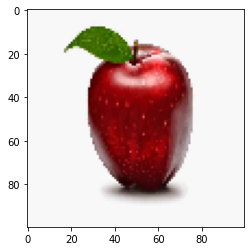

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'dau',
          1: 'duahau',
          2: 'dudu',
          3: 'mit',
          4: 'nho',
          5: 'oi',
          6: 'saurieng',
          7: 'tao',
          8: 'thanhlong',
          9: 'xoai',    
          }
model = load_model('FruitVn.h5')
	# load model
img = load_image('R.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 